In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Load the Dataset***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/LeftWristFinalDatasetWithlabels.csv')

##finding the index and the max of consecutive 1's
arr = list(df['label'])
count = 0
prev = 0
indexend = 0
for i in range(0,len(arr)):
    if arr[i] == 1:
        count += 1
    else:            
      if count > prev:
        prev = count
        indexend = i
      count = 0

print("The longest sequence of 1's is "+str(prev))
print("index start at: "+ str(indexend-prev))
print("index ends at: "+ str(indexend-1))

The longest sequence of 1's is 135
index start at: 319776
index ends at: 319910


In [ ]:
##finding the index and the max of consecutive 0's
arr = list(df['label'])
count = 0
prev = 0
indexend = 0
for i in range(0,len(arr)):
    if arr[i] == 0:
        count += 1
    else:            
      if count > prev:
        prev = count
        indexend = i
      count = 0

print("The longest sequence of 0's is "+str(prev))
print("index start at: "+ str(indexend-prev))
print("index ends at: "+ str(indexend-1))

The longest sequence of 0's is 128
index start at: 277912
index ends at: 278039


# ***TRAIN DATASET***

In [ ]:
from scipy.signal import find_peaks
import numpy as np
from scipy import stats
from scipy.signal import find_peaks

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/LeftWristFinalDatasetWithlabels.csv')

df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes
df['subj_id'] = df['subj_id'].astype('category')
df['subj_id'] = df['subj_id'].cat.codes

In [ ]:
df_train =  df[df.subj_id.isin( df.subj_id.unique()[:25] ) ]  #selecting 25 subjects for training

#find the peaks
x = df_train['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
peaks = np.insert(peaks, 0, 0, axis=0)
list_of_df = []
#list of dataframes for each stride.
for each in range(0, (len(peaks) - 1),1  ):
  list_of_df.append( df_train.loc[ peaks[each]:(peaks[each + 1] - 1 )]) 
#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=151 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 

print("Testing first left stride : ",list_of_Zerodf[0])
print("Testing first right stride : ",list_of_Zerodf[1])

#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)


# WINDOWING WITH NON OVERLAPPING WINDOWS with size 150
xs = []
ys = []
zs = []
train_labels = []
new_list = []
window_size = 150
step_size = 150

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 150]
  ys = FinalDataFrame['y'].values[i: i + 150]
  zs = FinalDataFrame['z'].values[i: i + 150]

  label = FinalDataFrame['label'].values[i: i + 150][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  train_labels.append(label)

train_x = np.asarray(new_list)
train_y = np.asarray(train_labels)

Testing first left stride :       Unnamed: 0  subj_id      loc_id  time_s  ...      y      z  magnitude  label
0             0       15  left_wrist    0.00  ... -0.773 -0.160   0.834284      0
1             1       15  left_wrist    0.01  ... -0.738 -0.172   0.803109      0
2             2       15  left_wrist    0.02  ... -0.707 -0.168   0.777690      0
3             3       15  left_wrist    0.03  ... -0.680 -0.160   0.751485      0
4             4       15  left_wrist    0.04  ... -0.656 -0.160   0.734477      0
..          ...      ...         ...     ...  ...    ...    ...        ...    ...
146           0        0           0    0.00  ...  0.000  0.000   0.000000      0
147           0        0           0    0.00  ...  0.000  0.000   0.000000      0
148           0        0           0    0.00  ...  0.000  0.000   0.000000      0
149           0        0           0    0.00  ...  0.000  0.000   0.000000      0
150           0        0           0    0.00  ...  0.000  0.000   0.0

In [ ]:
list_of_Zerodf[0]

,Unnamed: 0,subj_id,loc_id,time_s,x,y,z,magnitude,label
0,0,15,left_wrist,0.00,-0.270,-0.773,-0.160,0.834284,0
1,1,15,left_wrist,0.01,-0.266,-0.738,-0.172,0.803109,0
2,2,15,left_wrist,0.02,-0.277,-0.707,-0.168,0.777690,0
3,3,15,left_wrist,0.03,-0.277,-0.680,-0.160,0.751485,0
4,4,15,left_wrist,0.04,-0.289,-0.656,-0.160,0.734477,0
...,...,...,...,...,...,...,...,...,...
146,0,0,0,0.00,0.000,0.000,0.000,0.000000,0
147,0,0,0,0.00,0.000,0.000,0.000,0.000000,0
148,0,0,0,0.00,0.000,0.000,0.000,0.000000,0
149,0,0,0,0.00,0.000,0.000,0.000,0.000000,0


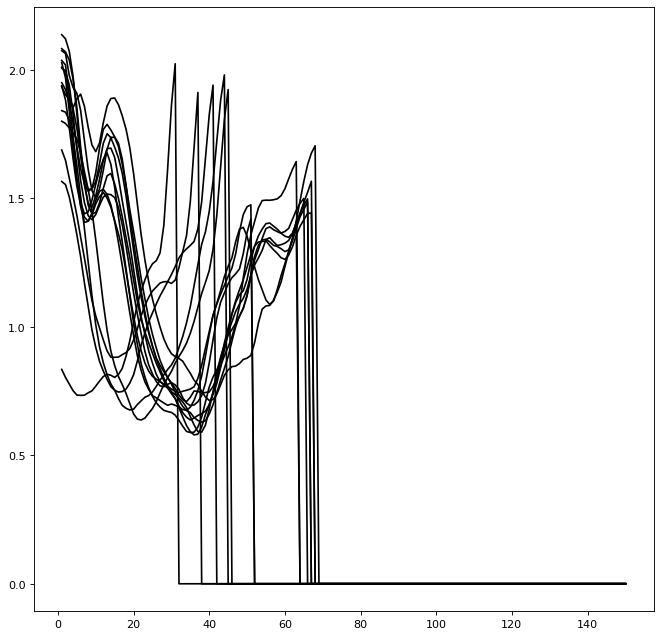

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(10, 10), dpi=80)
for each in range(0,30,2):
  plt.plot( np.arange(1,151)   , list(list_of_Zerodf[each]['magnitude']), color = "black" )
plt.show()

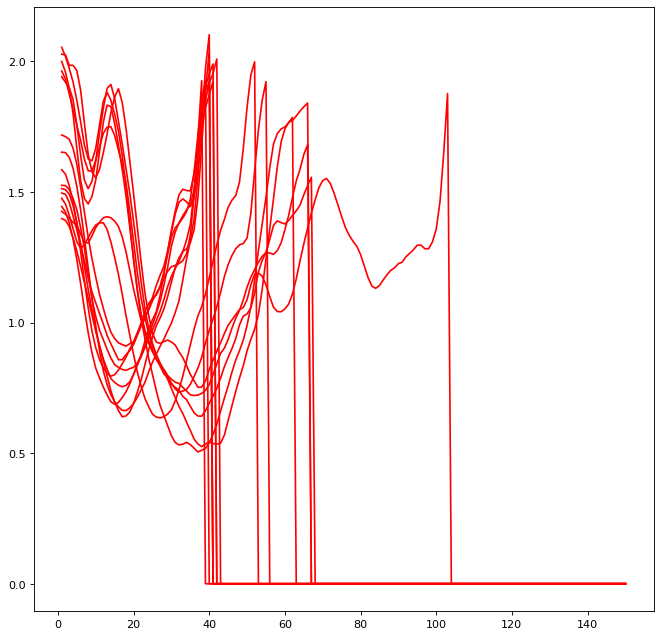

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(10, 10), dpi=80)
for each in range(1,31,2):
  plt.plot( np.arange(1,151)   , list(list_of_Zerodf[each]['magnitude']), color = "red" )
plt.show()

# ***CNN***

In [ ]:
model_cnn = Sequential() 

model_cnn.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3)))

model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=96, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='sigmoid'))
model_cnn.add(Dense(1,activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 149, 160)          1120      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 149, 160)         0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 148, 128)          41088     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 148, 128)         0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 147, 96)           24672     
                                                                 
 conv1d_17 (Conv1D)          (None, 146, 64)          

In [ ]:
model_cnn.fit(train_x, train_y, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 46ms/step - loss: 0.4453 - accuracy: 0.8024 - recall_6: 0.0170 - precision_6: 0.4156
Epoch 2/100
10/10 [==============================] - 0s 37ms/step - loss: 0.3702 - accuracy: 0.7912 - recall_6: 0.2544 - precision_6: 0.4440
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.3445 - accuracy: 0.8001 - recall_6: 0.2194 - precision_6: 0.4797
Epoch 4/100
10/10 [==============================] - 0s 37ms/step - loss: 0.3245 - accuracy: 0.8078 - recall_6: 0.2766 - precision_6: 0.5194
Epoch 5/100
10/10 [==============================] - 0s 36ms/step - loss: 0.3149 - accuracy: 0.8090 - recall_6: 0.4764 - precision_6: 0.5143
Epoch 6/100
10/10 [==============================] - 0s 37ms/step - loss: 0.3036 - accuracy: 0.8097 - recall_6: 0.3842 - precision_6: 0.5205
Epoch 7/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2876 - accuracy: 0.8141 - recall_6: 0.5405 - precision_6: 0.5255
Epoch 8/100
1

# ***TEST DATA***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/LeftWristFinalDatasetWithlabels.csv')

df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes
df['subj_id'] = df['subj_id'].astype('category')
df['subj_id'] = df['subj_id'].cat.codes
df_test = df[df.subj_id.isin( df.subj_id.unique()[25:] )]

#find the peaks
x = df_test['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
peaks = np.insert(peaks, 0, 0, axis=0)
list_of_df = []
#list of dataframes for each stride.
for each in range(0, (len(peaks) - 1),1  ):
  list_of_df.append( df_test.loc[ peaks[each]:(peaks[each + 1] - 1 )]) 
#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=151 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 

print(list_of_Zerodf[3])

#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)

xs = []
ys = []
zs = []
train_labels = []
new_list = []
window_size = 150
step_size = 150

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 150]
  ys = FinalDataFrame['y'].values[i: i + 150]
  zs = FinalDataFrame['z'].values[i: i + 150]

  label = FinalDataFrame['label'].values[i: i + 150][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  train_labels.append(label)

test_x = np.asarray(new_list)
test_y = np.asarray(train_labels)

     Unnamed: 0  subj_id loc_id  time_s    x    y    z  magnitude  label
1             0        0      0     0.0  0.0  0.0  0.0        0.0      0
2             0        0      0     0.0  0.0  0.0  0.0        0.0      0
3             0        0      0     0.0  0.0  0.0  0.0        0.0      0
4             0        0      0     0.0  0.0  0.0  0.0        0.0      0
5             0        0      0     0.0  0.0  0.0  0.0        0.0      0
..          ...      ...    ...     ...  ...  ...  ...        ...    ...
146           0        0      0     0.0  0.0  0.0  0.0        0.0      0
147           0        0      0     0.0  0.0  0.0  0.0        0.0      0
148           0        0      0     0.0  0.0  0.0  0.0        0.0      0
149           0        0      0     0.0  0.0  0.0  0.0        0.0      0
150           0        0      0     0.0  0.0  0.0  0.0        0.0      0

[150 rows x 9 columns]


# ***EVALUATION***

In [ ]:
scores = model_cnn.evaluate(test_x,test_y, verbose=1)

88/88 [==============================] - 1s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - recall_6: 0.0000e+00 - precision_6: 0.0000e+00


In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2799]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2799

    accuracy                           1.00      2799
   macro avg       1.00      1.00      1.00      2799
weighted avg       1.00      1.00      1.00      2799



# ***EXP2***

In [ ]:
model_cnn1 = Sequential() 

model_cnn1.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3)))

model_cnn1.add(MaxPooling1D(pool_size=1))
model_cnn1.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=1))
# model_cnn1.add(Conv1D(filters=96, kernel_size=2, activation='relu'))
# model_cnn1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=1))
model_cnn1.add(Flatten())
model_cnn1.add(Dropout(0.5))
# model_cnn1.add(Dense(64, activation='sigmoid'))
model_cnn1.add(Dense(1,activation='sigmoid'))

model_cnn1.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 149, 160)          1120      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 149, 160)         0         
 1D)                                                             
                                                                 
 conv1d_19 (Conv1D)          (None, 148, 128)          41088     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 148, 128)         0         
 g1D)                                                            
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 148, 128)         0         
 g1D)                                                            
                                                      

In [ ]:
model_cnn.fit(train_x, train_y, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 38ms/step - loss: 0.2103 - accuracy: 0.8874 - recall_6: 0.7085 - precision_6: 0.7150
Epoch 2/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2061 - accuracy: 0.8907 - recall_6: 0.7138 - precision_6: 0.7250
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2073 - accuracy: 0.8894 - recall_6: 0.7186 - precision_6: 0.7178
Epoch 4/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2071 - accuracy: 0.8886 - recall_6: 0.7260 - precision_6: 0.7121
Epoch 5/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2042 - accuracy: 0.8917 - recall_6: 0.7144 - precision_6: 0.7283
Epoch 6/100
10/10 [==============================] - 0s 36ms/step - loss: 0.2050 - accuracy: 0.8971 - recall_6: 0.7276 - precision_6: 0.7426
Epoch 7/100
10/10 [==============================] - 0s 36ms/step - loss: 0.2049 - accuracy: 0.8930 - recall_6: 0.7239 - precision_6: 0.7289
Epoch 8/100
1

In [ ]:
scores = model_cnn.evaluate(test_x,test_y, verbose=1)
scores

88/88 [==============================] - 0s 3ms/step - loss: 1.0484e-06 - accuracy: 1.0000 - recall_6: 0.0000e+00 - precision_6: 0.0000e+00


[1.048384888235887e-06, 1.0, 0.0, 0.0]

In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2799]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2799

    accuracy                           1.00      2799
   macro avg       1.00      1.00      1.00      2799
weighted avg       1.00      1.00      1.00      2799



## ***EXP 3***

In [ ]:
from keras import regularizers

In [ ]:
model_cnn2 = Sequential() 

model_cnn2.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3),kernel_regularizer=regularizers.l2(0.01)))

model_cnn2.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model_cnn2.add(Flatten())
model_cnn2.add(Dropout(0.7))

model_cnn2.add(Dense(1,activation='sigmoid'))

model_cnn2.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 149, 160)          1120      
                                                                 
 conv1d_21 (Conv1D)          (None, 148, 128)          41088     
                                                                 
 flatten_8 (Flatten)         (None, 18944)             0         
                                                                 
 dropout_8 (Dropout)         (None, 18944)             0         
                                                                 
 dense_10 (Dense)            (None, 1)                 18945     
                                                                 
Total params: 61,153
Trainable params: 61,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cnn2.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 27ms/step - loss: 0.5812 - accuracy: 0.7284 - recall_2: 0.2205 - precision_2: 0.4554
Epoch 2/50
10/10 [==============================] - 0s 26ms/step - loss: 0.4742 - accuracy: 0.7535 - recall_2: 0.4291 - precision_2: 0.5330
Epoch 3/50
10/10 [==============================] - 0s 27ms/step - loss: 0.4334 - accuracy: 0.7552 - recall_2: 0.3899 - precision_2: 0.5413
Epoch 4/50
10/10 [==============================] - 0s 26ms/step - loss: 0.4156 - accuracy: 0.7569 - recall_2: 0.4511 - precision_2: 0.5397
Epoch 5/50
10/10 [==============================] - 0s 26ms/step - loss: 0.4075 - accuracy: 0.7615 - recall_2: 0.5014 - precision_2: 0.5457
Epoch 6/50
10/10 [==============================] - 0s 26ms/step - loss: 0.3996 - accuracy: 0.7664 - recall_2: 0.4910 - precision_2: 0.5584
Epoch 7/50
10/10 [==============================] - 0s 26ms/step - loss: 0.3991 - accuracy: 0.7562 - recall_2: 0.4315 - precision_2: 0.5397
Epoch 8/50
10/10 [==

In [ ]:
scores = model_cnn2.evaluate(test_x,test_y, verbose=1)
scores

88/88 [==============================] - 1s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00


[0.008947615511715412, 1.0, 0.0, 0.0]

In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2799]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2799

    accuracy                           1.00      2799
   macro avg       1.00      1.00      1.00      2799
weighted avg       1.00      1.00      1.00      2799



# ***EXP4***

In [ ]:
from keras.regularizers import l2

model_cnn3 = Sequential() 

model_cnn3.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_cnn3.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_cnn3.add(Flatten())
model_cnn3.add(Dropout(0.7))

model_cnn3.add(Dense(1,activation='sigmoid'))

model_cnn3.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn3.summary()

#_________
model_cnn3.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1)
#________
scores = model_cnn3.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 199, 160)          1120      
                                                                 
 conv1d_9 (Conv1D)           (None, 198, 128)          41088     
                                                                 
 flatten_3 (Flatten)         (None, 25344)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25344)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 25345     
                                                                 
Total params: 67,553
Trainable params: 67,553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] 

[0.015936419367790222, 1.0, 0.0, 0.0]

# ***EXP5***

In [ ]:
from keras.regularizers import l2

from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=100)

model_cnn4 = Sequential() 
model_cnn4.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Flatten())
model_cnn4.add(Dropout(0.7))
model_cnn4.add(Dense(1,activation='sigmoid'))


model_cnn4.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn4.summary()

#_________
model_cnn4.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1,callbacks=[rlrop])
#________
scores = model_cnn4.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 199, 160)          1120      
                                                                 
 conv1d_11 (Conv1D)          (None, 198, 128)          41088     
                                                                 
 flatten_4 (Flatten)         (None, 25344)             0         
                                                                 
 dropout_4 (Dropout)         (None, 25344)             0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25345     
                                                                 
Total params: 67,553
Trainable params: 67,553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] 

[0.016558684408664703, 1.0, 0.0, 0.0]

## ***EXP7***

In [ ]:
from keras.regularizers import l2
# import noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.1)




model_cnn6 = Sequential() 
model_cnn6.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(150,3) , kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Flatten())
model_cnn6.add(Dropout(0.7))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Dense(1,activation='sigmoid'))



model_cnn6.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn6.summary()

#_________
model_cnn6.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1, validation_split=0.2)
#________
scores = model_cnn6.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 199, 160)          1120      
                                                                 
 gaussian_noise_1 (GaussianN  (None, 199, 160)         0         
 oise)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 198, 128)          41088     
                                                                 
 gaussian_noise_2 (GaussianN  (None, 198, 128)         0         
 oise)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 25344)             0         
                                                                 
 dropout_5 (Dropout)         (None, 25344)            

[0.06268198788166046, 1.0, 0.0, 0.0]